In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median, mean
sns.set_theme()
# sns.set_theme(style="ticks")

# Load data

In [23]:
tips = sns.load_dataset("tips")
tips['Tip [%]'] = (tips['tip']/tips['total_bill'])*100
tips

,total_bill,tip,sex,smoker,day,time,size,Tip [%]
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [24]:
tips.groupby(['time']).agg(
    count       = ('Tip [%]', 'count'), 
    mean        = ('Tip [%]', 'mean'),
    min         = ('Tip [%]', 'min'),
    perc_05     = ('Tip [%]', lambda x: x.quantile(0.05)),
    quantile_Q1 = ('Tip [%]', lambda x: x.quantile(0.25)),
    median      = ('Tip [%]', 'median'),
    quantile_Q3 = ('Tip [%]', lambda x: x.quantile(0.75)),
    perc_95     = ('Tip [%]', lambda x: x.quantile(0.95)),
    perc_99     = ('Tip [%]', lambda x: x.quantile(0.99)),
    max         = ('Tip [%]', 'max'),
)

,count,mean,min,perc_05,quantile_Q1,median,quantile_Q3,perc_95,perc_99,max
time,,,,,,,,,,
Lunch,68,16.412793,7.296137,10.268848,13.914666,15.408357,19.391734,23.220675,26.162351,26.631158
Dinner,176,15.951779,3.563814,7.637882,12.319151,15.540002,18.820878,24.179134,34.846634,71.034483


# Plot comparison

In [25]:
x = "Tip [%]"
y = "time"
plot_args = {'x':x, 'y':y, 'data':tips}

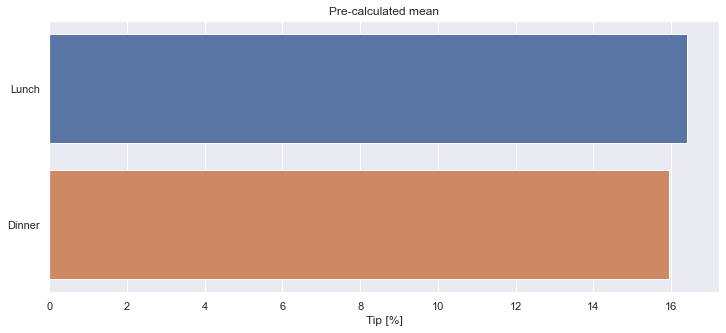

In [26]:
f, ax = plt.subplots(figsize=(12, 5))
df_plot = tips.groupby(y)[x].mean().reset_index()
sns.barplot(x=x, y=y, data=df_plot)

# Tweak the visual presentation
ax.set_title('Pre-calculated mean')
ax.xaxis.grid(True)
ax.set(ylabel="");

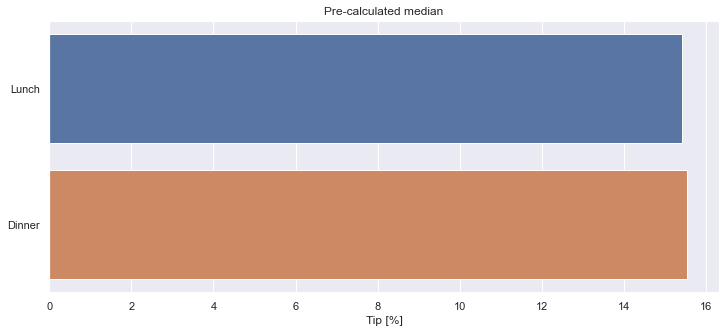

In [27]:
f, ax = plt.subplots(figsize=(12, 5))
df_plot = tips.groupby(y)[x].median().reset_index()
sns.barplot(x=x, y=y, data=df_plot)

# Tweak the visual presentation
ax.set_title('Pre-calculated median')
ax.xaxis.grid(True)
ax.set(ylabel="");

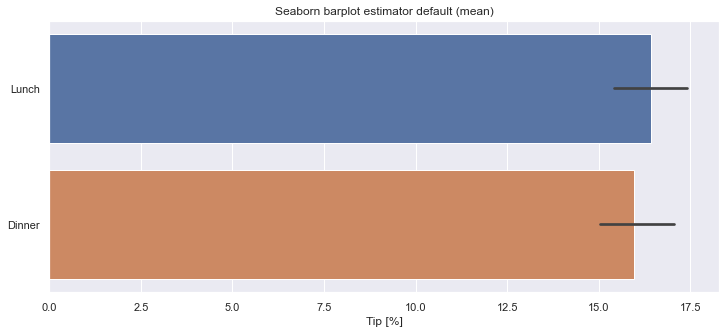

In [28]:
f, ax = plt.subplots(figsize=(12, 5))
sns.barplot(**plot_args) # Default estimator is mean

# Tweak the visual presentation
ax.set_title('Seaborn barplot estimator default (mean)')
ax.xaxis.grid(True)
ax.set(ylabel="");

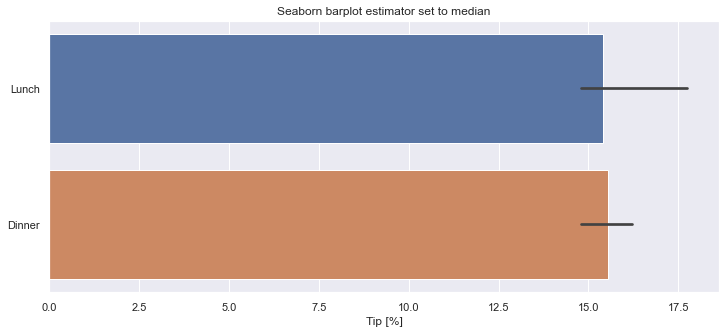

In [29]:
f, ax = plt.subplots(figsize=(12, 5))
sns.barplot(**plot_args, estimator=median)

# Tweak the visual presentation
ax.set_title('Seaborn barplot estimator set to median')
ax.xaxis.grid(True)
ax.set(ylabel="");

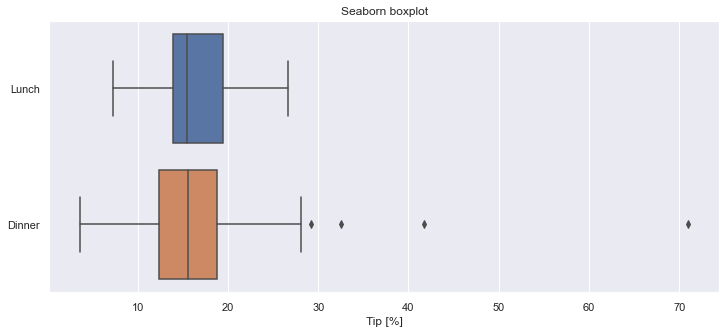

In [30]:
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(**plot_args)

# Tweak the visual presentation
ax.set_title('Seaborn boxplot')
ax.xaxis.grid(True)
ax.set(ylabel="");

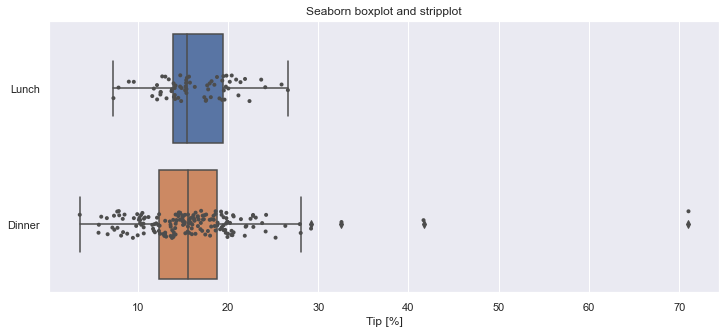

In [31]:
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(**plot_args)

# Add in points to show each observation
sns.stripplot(**plot_args, size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.set_title('Seaborn boxplot and stripplot')
ax.xaxis.grid(True)
ax.set(ylabel="");

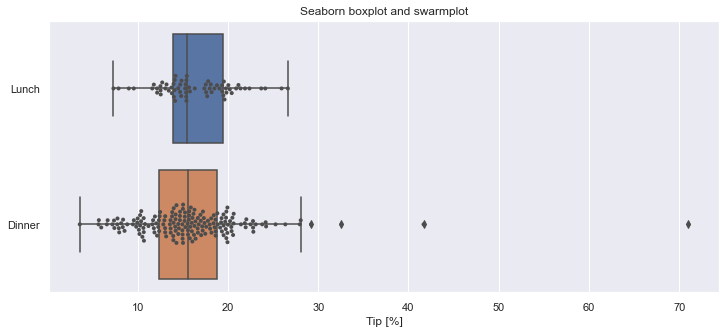

In [32]:
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(**plot_args)

# Add in points to show each observation
sns.swarmplot(**plot_args, size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.set_title('Seaborn boxplot and swarmplot')
ax.xaxis.grid(True)
ax.set(ylabel="");

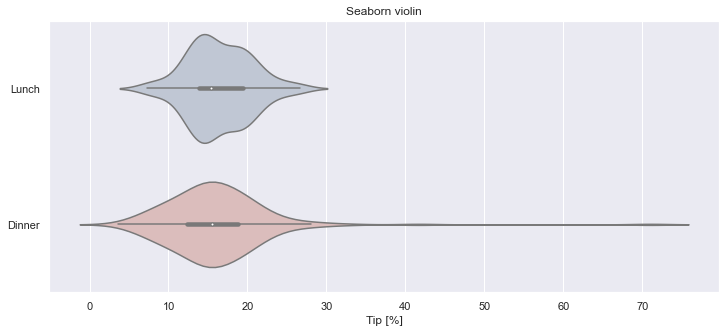

In [33]:
f, ax = plt.subplots(figsize=(12, 5))
sns.violinplot(**plot_args, palette="vlag")

# Tweak the visual presentation
ax.set_title('Seaborn violin')
ax.xaxis.grid(True)
ax.set(ylabel="");

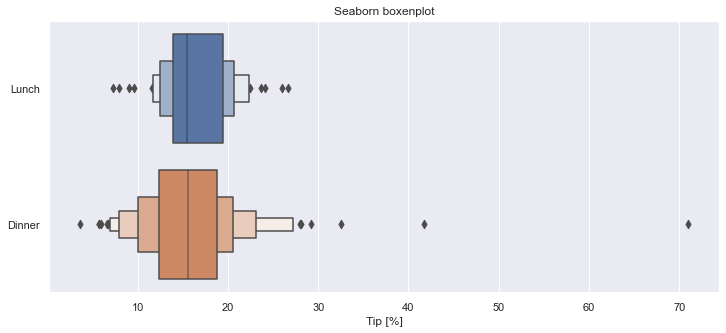

In [34]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(12, 5))

# Plot the orbital period with horizontal boxes
sns.boxenplot(**plot_args)

# Tweak the visual presentation
ax.set_title('Seaborn boxenplot')
ax.xaxis.grid(True)
ax.set(ylabel="");

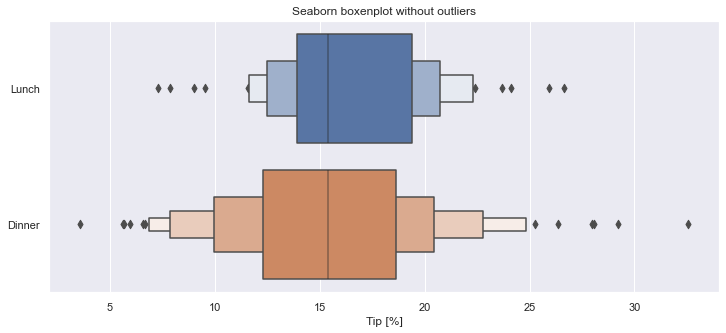

In [52]:
f, ax = plt.subplots(figsize=(12, 5))
df_plot_cut = tips[tips[x] < 35]
sns.boxenplot(x=x, y=y, data=df_plot_cut)

# Tweak the visual presentation
ax.set_title('Seaborn boxenplot without outliers')
ax.xaxis.grid(True)
ax.set(ylabel="");

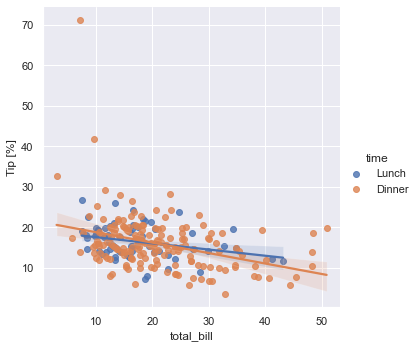

In [53]:
#sns.lmplot(data=tips, x="total_bill", y="tip", hue="time")
sns.lmplot(data=tips, x="total_bill", y=x, hue="time")

# Tweak the visual presentation
ax.set_title('Seaborn lmplot with ln')
ax.xaxis.grid(True)
ax.set(ylabel="");

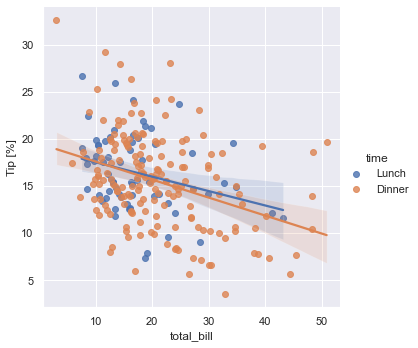

In [54]:
#sns.lmplot(data=tips, x="total_bill", y="tip", hue="time")
sns.lmplot(data=df_plot_cut, x="total_bill", y=x, hue="time")

# Tweak the visual presentation
ax.set_title('Seaborn lmplot with ln')
ax.xaxis.grid(True)

ax.set(ylabel="");

<AxesSubplot:xlabel='total_bill', ylabel='Tip [%]'>

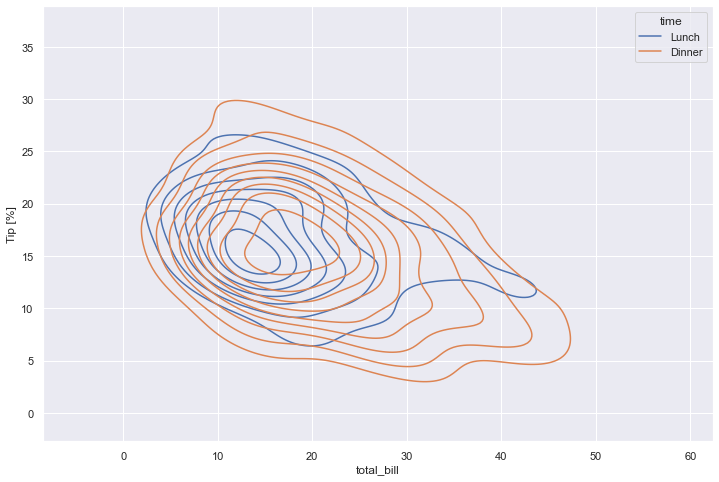

In [60]:
f, ax = plt.subplots(figsize=(12, 8))

sns.kdeplot(data=df_plot_cut, x="total_bill", y=x, hue="time", thresh=.1,)